In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
from keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
input_dim = x_train.shape[1]*x_train.shape[2]
input_dim

784

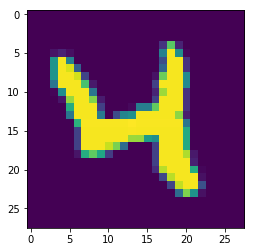

In [0]:
plt.imshow(x_train[20])

In [0]:
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
from keras.utils import to_categorical
from keras.layers import Activation,Input,Dense
from keras.models import Model
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
#enc = OneHotEncoder()
#y_test = enc.fit_transform(y_test.reshape((-1, 1))).toarray()
#y_train = enc.fit_transform(y_train.reshape((-1,1))).toarray()

In [0]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [0]:
img_input =Input(shape=(784,))
x=Dense(units=128,activation="softmax")(img_input)
x=Dense(units=10,activation="sigmoid")(x)

In [0]:
model=Model(inputs=img_input,outputs=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=6,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 2s 48us/step - loss: 2.0631 - acc: 0.7605 - val_loss: 1.8287 - val_acc: 0.8912
Epoch 2/6
48000/48000 [==============================] - 2s 42us/step - loss: 1.6133 - acc: 0.8985 - val_loss: 1.3844 - val_acc: 0.9157
Epoch 3/6
48000/48000 [==============================] - 2s 42us/step - loss: 1.1915 - acc: 0.9157 - val_loss: 0.9999 - val_acc: 0.9253
Epoch 4/6
48000/48000 [==============================] - 2s 42us/step - loss: 0.8614 - acc: 0.9259 - val_loss: 0.7311 - val_acc: 0.9293
Epoch 5/6
48000/48000 [==============================] - 2s 42us/step - loss: 0.6434 - acc: 0.9307 - val_loss: 0.5636 - val_acc: 0.9303
Epoch 6/6
48000/48000 [==============================] - 3s 56us/step - loss: 0.5075 - acc: 0.9335 - val_loss: 0.4607 - val_acc: 0.9327


In [0]:
print(model.metrics_names)
model.evaluate(x_test,y_test,batch_size=128)

['loss', 'acc']
10000/10000 [==============================] - 0s 27us/step


[0.46025864849090575, 0.9334]

In [0]:
preds=model.predict(x_test,batch_size=128)
preds=preds.argmax(axis=1)
preds

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
y_test=y_test.argmax(axis=1)

In [0]:
preds[:10],y_test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

In [0]:
from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1020
           1       0.97      0.98      0.98      1126
           2       0.91      0.94      0.93      1002
           3       0.93      0.89      0.91      1062
           4       0.94      0.93      0.94       991
           5       0.88      0.94      0.91       837
           6       0.95      0.95      0.95       964
           7       0.93      0.94      0.93      1012
           8       0.91      0.90      0.91       992
           9       0.91      0.92      0.91       994

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

